# Lecture 10-1

# Modeling in Python: statsmodels & sklearn

## Week 10 Monday

## Miles Chen, PhD

# modeling data in python:

Most popular package is scikit learn. Scikit-learn is not the best for a 'traditional' stats approach.

the statsmodels library is better suited for traditional stats

Be sure to visit and read the documentation on the StatsModels website: https://www.statsmodels.org/stable/index.html

In [1]:
# the statsmodels.api uses numpy array notation
# statsmodels.formula.api use formula notation (similar to R's formula notation)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# A minimal OLS example

Four pairs of points

In [2]:
x = np.array([1,2,3,4])
y = np.array([2,6,4,8])

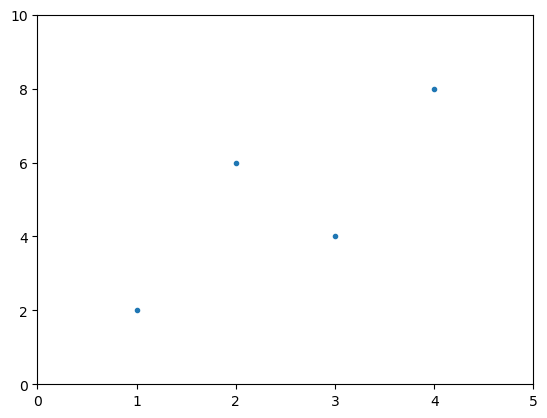

In [3]:
plt.scatter(x,y, marker = '.')
plt.xlim(0,5)
plt.ylim(0,10)
plt.show()

In [4]:
# make a dataframe of our data
d = pd.DataFrame({'x':x, 'y':y})
print(d)

   x  y
0  1  2
1  2  6
2  3  4
3  4  8


Seaborn lmplot

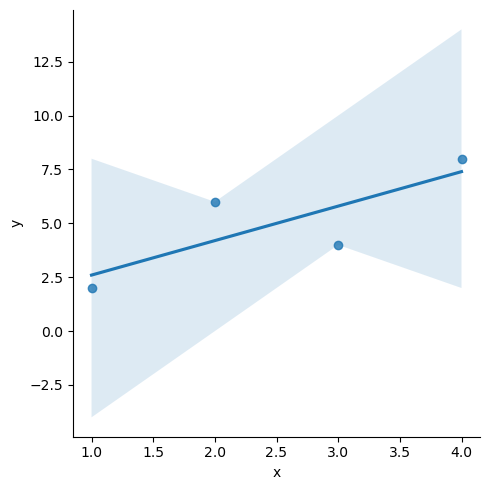

In [5]:
sns.lmplot(x = 'x', y = 'y', data = d)

## formula notation with statsmodels
use statsmodels.formula.api (often imported as smf)

In [6]:
# data is in a dataframe
model = smf.ols('y ~ x', data = d)

In [7]:
print(model)

In [8]:
# estimation of coefficients is not done until you call fit() on the model
results = model.fit()

In [9]:
print(results)

In [10]:
print(results.summary())
# the intercept here is artificially too big because boys are 1, and girls are 2
# so a baby boy will subtract 1 times 0.7327, and a girl will subtract 2 times 0.7327


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     3.556
Date:                Mon, 03 Jun 2024   Prob (F-statistic):              0.200
Time:                        08:55:59   Log-Likelihood:                -6.8513
No. Observations:                   4   AIC:                             17.70
Df Residuals:                       2   BIC:                             16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0000      2.324      0.430      0.7

C:\Users\Miles\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Using the abline_plot function for plotting the results

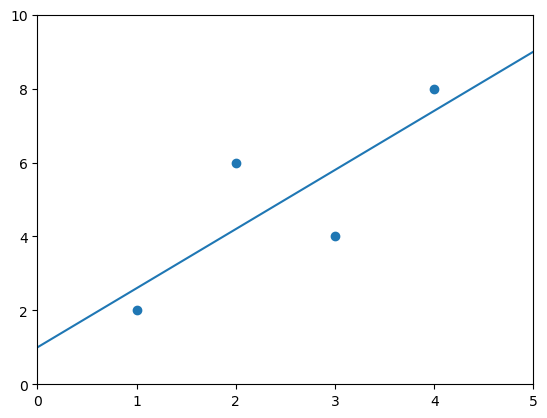

In [11]:
sm.graphics.abline_plot(model_results = results)
plt.scatter(d.x, d.y)

plt.xlim(0,5)
plt.ylim(0,10)

plt.show()

Generating an anova table

In [12]:
print(sm.stats.anova_lm(results))

           df  sum_sq  mean_sq         F  PR(>F)
x         1.0    12.8     12.8  3.555556     0.2
Residual  2.0     7.2      3.6       NaN     NaN


Making predictions

In [13]:
results.predict({'x' : 2})

0    4.2
dtype: float64

## numpy array notation
similar to sklearn's notation

In [14]:
print(x)

[1 2 3 4]


In [15]:
X = sm.add_constant(x)  # need to add a constant for the intercept term.
# because we are using the numpy notation, we use sm rather than smf

In [16]:
print(X)

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]]


$$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$$

$$\hat y_i = \beta_0 + \beta_1 x_i$$


$$\mathbf{\hat{Y}} = \boldsymbol{\beta} \mathbf{X}$$

$$\boldsymbol{\beta} = \left [\beta_0, \beta_1 \right ]$$


In [17]:
y

array([2, 6, 4, 8])

In [18]:
model2 = sm.OLS(y, X)  # OLS is capitalized in the numpy notation

In [19]:
results2 = model2.fit()

In [20]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     3.556
Date:                Mon, 03 Jun 2024   Prob (F-statistic):              0.200
Time:                        08:55:59   Log-Likelihood:                -6.8513
No. Observations:                   4   AIC:                             17.70
Df Residuals:                       2   BIC:                             16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0000      2.324      0.430      0.7

C:\Users\Miles\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


OLS solution:

$$(X^TX)^{-1}X^TY$$

In [21]:
X

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.]])

In [22]:
np.linalg.inv(X.T @ X) @ (X.T @ y)

array([1. , 1.6])

## Example

Taken directly from https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

In [23]:
np.random.seed(9876789)

generate artificial data:

In [24]:
nsample = 101
x = np.linspace(0, 10, nsample)
X = np.column_stack((x, x ** 2))

In [25]:
X[:6,:]

array([[0.  , 0.  ],
       [0.1 , 0.01],
       [0.2 , 0.04],
       [0.3 , 0.09],
       [0.4 , 0.16],
       [0.5 , 0.25]])

In [26]:
X[95:,:]

array([[  9.5 ,  90.25],
       [  9.6 ,  92.16],
       [  9.7 ,  94.09],
       [  9.8 ,  96.04],
       [  9.9 ,  98.01],
       [ 10.  , 100.  ]])

X has two columns. First column goes from 0 to 10. Values are spaced out by 0.1.
 The second column is the first column squared. Values go from 0 to 100.

In [27]:
beta = np.array([10, 5, 2])
e = np.random.normal(size=nsample, scale = 20)

In [28]:
X = sm.add_constant(X)
y_true = np.dot(X, beta)
y = y_true + e

Note we added a column of 1s to the matrix X.

The true values of beta are 1 for the intercept, 0.1 for the linear component, and 10 for the quadratic.

In [29]:
X[:6,:]

array([[1.  , 0.  , 0.  ],
       [1.  , 0.1 , 0.01],
       [1.  , 0.2 , 0.04],
       [1.  , 0.3 , 0.09],
       [1.  , 0.4 , 0.16],
       [1.  , 0.5 , 0.25]])

We use array notation.

In [30]:
y_true[:6]

array([10.  , 10.52, 11.08, 11.68, 12.32, 13.  ])

In [31]:
y[:6]

array([-6.81031788, 42.46990517, 20.39084082,  1.51682128, 71.00611392,
       21.2578884 ])

In [32]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     596.2
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           1.40e-55
Time:                        08:56:00   Log-Likelihood:                -450.04
No. Observations:                 101   AIC:                             906.1
Df Residuals:                      98   BIC:                             913.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8504      6.193      2.721      0.0

Quantities of interest can be extracted directly from the fitted model. Type `dir(results)` for a full list. Here are some examples:

In [33]:
print("Parameters: ", results.params)
print("R2: ", results.rsquared)

Parameters:  [16.85044423  2.16361558  2.20962084]
R2:  0.9240498683747473


You can use the `get_prediction()` method which produces a prediction results object.

In [34]:
pred_ols = results.get_prediction()

In [35]:
pred_ols

The prediction results object has another method `summary_frame()` which produces a data frame of predictions for each observation. The columns are as follows.

In [36]:
pred_ols.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,16.850444,6.192862,4.560911,29.139977,-26.898503,60.599391
1,17.088902,5.950169,5.280985,28.896819,-26.527203,60.705007
2,17.371552,5.715143,6.030038,28.713067,-26.120604,60.863709
3,17.698395,5.487954,6.807729,28.589061,-25.678377,61.075167
4,18.069430,5.268787,7.613694,28.525166,-25.200192,61.339051
...,...,...,...,...,...,...
96,241.259810,5.268787,230.804074,251.715546,197.990188,284.529432
97,245.740740,5.487954,234.850074,256.631406,202.363968,289.117512
98,250.265862,5.715143,238.924348,261.607376,206.773705,293.758019
99,254.835177,5.950169,243.027260,266.643094,211.219071,298.451282


With the summary frame, we can produce a prediction interval.

In [37]:
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

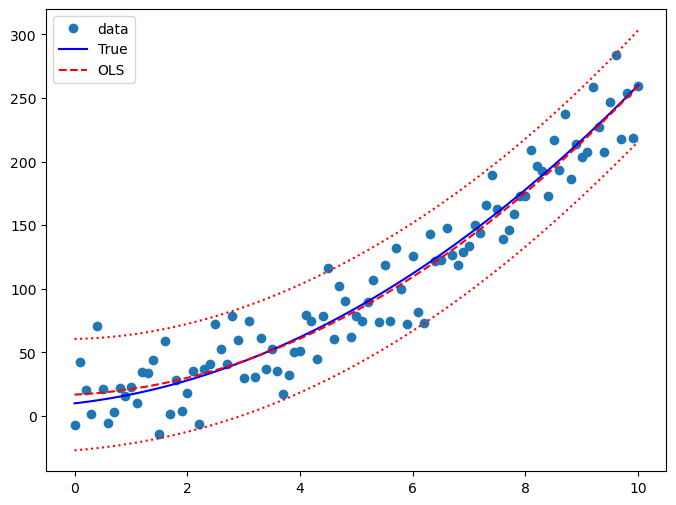

In [38]:
plt.figure(figsize=(8, 6))
plt.plot(x, y, "o", label="data")
plt.plot(x, y_true, "b", label="True")
plt.plot(x, results.fittedvalues, "r--", label="OLS")
plt.plot(x, iv_u, "r:")
plt.plot(x, iv_l, "r:")
plt.legend(loc="best")

# Scikit Learn

## classification example with iris data


In [39]:
from sklearn.datasets import load_iris

In [40]:
iris = load_iris()
type(iris) # iris is a Bunch (like a dictionary)

sklearn.utils._bunch.Bunch

In [41]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [42]:
print(iris.data[:10,]) # first 10 rows: we have 4 columns of variables

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [43]:
print(iris.feature_names)  # The predictor variables (features) are four numeric variables

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [44]:
iris.target # the target is a categorical variable with three levels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [45]:
print(iris.target_names) # the observations are one of the following three species

['setosa' 'versicolor' 'virginica']


In [46]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    test_size = 0.2, random_state = 1, 
                                                    stratify = iris.target)
# we stratify on iris.target to make sure that the training and test sets have the correct 

In [48]:
X_train.shape

(120, 4)

In [49]:
print(np.bincount(y_test))

[10 10 10]


# we will fit a k nearest neighbors classifier

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
dat = pd.DataFrame(X_train)
dat['species'] = pd.DataFrame(y_train)
dat.head()

,0,1,2,3,species
0,5.1,3.7,1.5,0.4,0
1,4.6,3.2,1.4,0.2,0
2,6.9,3.1,5.1,2.3,2
3,5.5,2.6,4.4,1.2,1
4,5.6,2.9,3.6,1.3,1


In [52]:
dat = dat.replace([np.inf, -np.inf], np.nan)

C:\Users\Miles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Miles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Miles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

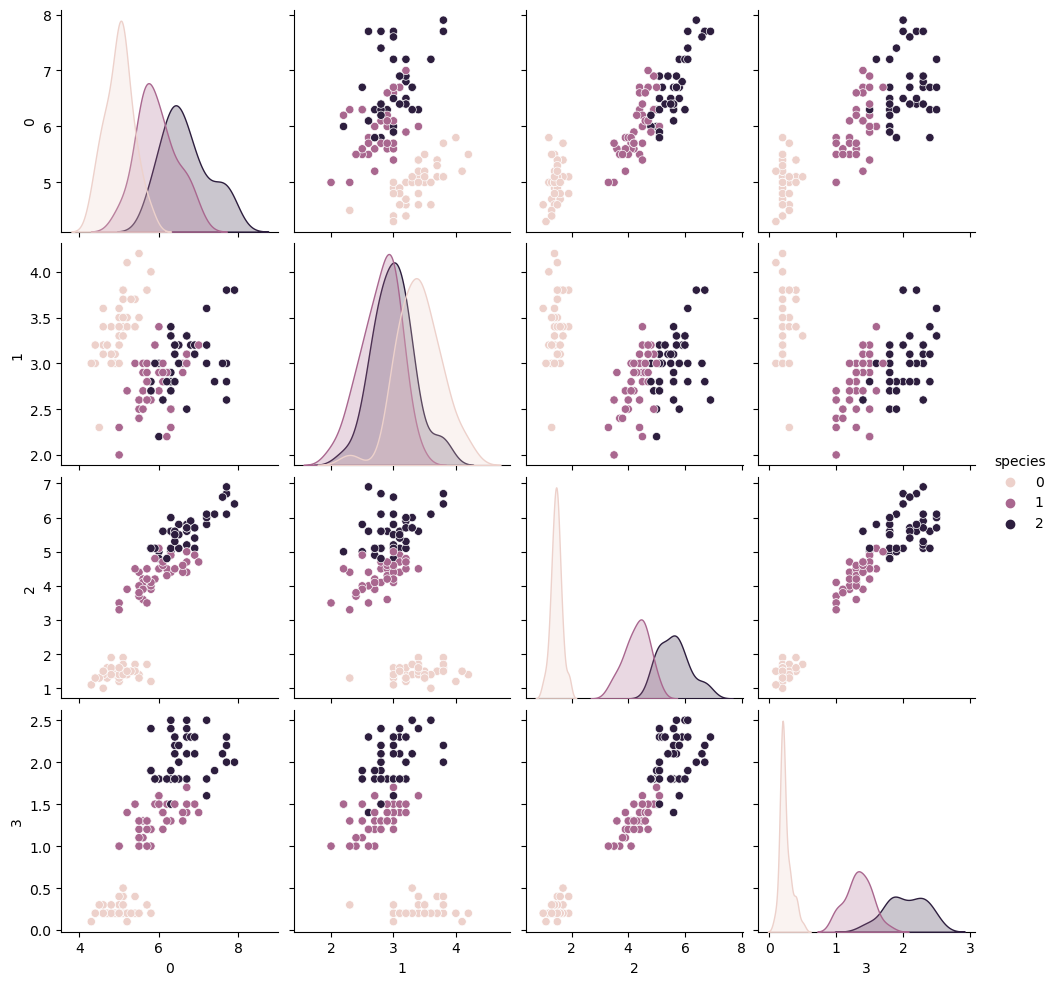

In [53]:
sns.pairplot(dat, hue = 'species')

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [55]:
print(knn)

KNeighborsClassifier()


In [56]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [57]:
print(knn.predict(X_test))  # our predictions based on the fitted model

[2 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 2 1 1 2 1 1 0 0 2 1 0 0 1 1]


In [58]:
print(y_test)  # the actual values

[2 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 2 1 1 2 1 1 0 0 2 2 0 0 1 1]


In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, knn.predict(X_test))
# true answer is in rows, and the prediction is in the column
# we see that when the true answer is 2, the predition was 1 one time.
# no errors would be a diagonal matrix

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  9]], dtype=int64)

In [60]:
# here we try a different knn model using only one nearest neighbor
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
confusion_matrix(y_test, knn1.predict(X_test))
# same performance

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  9]], dtype=int64)

In [61]:
# another knn model using 25 nearest neighbors
knn25 = KNeighborsClassifier(n_neighbors=25)
knn25.fit(X_train, y_train)
confusion_matrix(y_test, knn25.predict(X_test))
# slighlty worse performance with 25 nearest neighbors
# we have 2 errors. The true value is 2 and we predicted 1 twice.

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  2,  8]], dtype=int64)

# Automated parameter search using GridSearchCV

What if I want to test out a bunch of different nearest neighbor values.

So we can try a knn with 1 nearest neighbor

a knn with 2 neighbors

knn with 3 neighbors, etc.

Rather than manually fitting 50 different models, we can have python automatically fit 50 models for us using GridSearchCV.

GridSearchCV will try a bunch of different models (you can vary more than one parameter), and will report back the model score.

Keep in mind that the more parameters you try out, the longer it will take to test and fit all of the models.

In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1,50), 'weights': ['uniform','distance']}  # we make a dictionary called param_grid
# and the keyword will be the argument that goes into the model

knn = KNeighborsClassifier()  # note we do not specify n_neighbors here
knn_cv = GridSearchCV(knn, param_grid, cv = 5)  # we call GridSearchCV, we pass it the name of our model 'knn', and 
# also we give it the parameters it will search through
# cv=5 means we score it based on 5-fold cross validation

# we are not using the test data at all
# we are only using the training data

In [63]:
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']})

In [64]:
knn_cv.best_params_  # which set of parameters produced the best performing model?

{'n_neighbors': 13, 'weights': 'uniform'}

In [65]:
knn_cv.best_score_   # uses an accuracy score, which may not be the best metric

0.9833333333333334

In [66]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print(confusion_matrix(y_train, knn.predict(X_train)))

[[40  0  0]
 [ 0 38  2]
 [ 0  0 40]]


In [67]:
118/120

0.9833333333333333

In [68]:
print(confusion_matrix(y_test, knn.predict(X_test)))

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


In [69]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=13)
cv_scores = cross_val_score(knn, X_train, y_train, cv = 5)
print(cv_scores)
print(np.mean(cv_scores))

[0.95833333 1.         1.         1.         0.95833333]
0.9833333333333334


## Gaussian Naive Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB
nbclass = GaussianNB()

In [71]:
nbclass.fit(X_train, y_train)

GaussianNB()

In [72]:
nbclass.predict(X_test)

array([2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1])

In [73]:
print(confusion_matrix(y_test, nbclass.predict(X_test)))

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


In [74]:
cross_val_score(nbclass, X_train, y_train, cv = 5)

array([0.91666667, 0.95833333, 0.95833333, 0.95833333, 0.95833333])

In [75]:
np.mean(cross_val_score(nbclass, X_train, y_train, cv = 5))

0.95